# Data Incubator Project Proposal - Oct 2017
 Fetal Death Causal Analysis
 
 

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt

In [19]:
cols=[(6,7),(9,10),(130,131),(24,25),(300,301),(315,316),(348,352),(339,340),(2602,2606)]
headerNames = ["Version", "OEFlag", "Resident", "Delivery_weekday","Fetus Plurality", "Infant_Gender", "Delivery Weight(gms)","GA","ICD10"]
df = pd.read_fwf('./Fetal2014US_COD.txt', colspecs=cols, header=None, index_col=0, names=headerNames)
df.head()

,OEFlag,Resident,Delivery_weekday,Fetus Plurality,Infant_Gender,Delivery Weight(gms),GA,ICD10
Version,,,,,,,,
S,2,1,5,1,F,260,2,NaN
S,2,1,1,1,M,459,2,NaN
S,2,1,2,1,M,1588,3,NaN
S,2,1,5,2,F,300,2,NaN
S,2,1,5,2,F,300,2,NaN


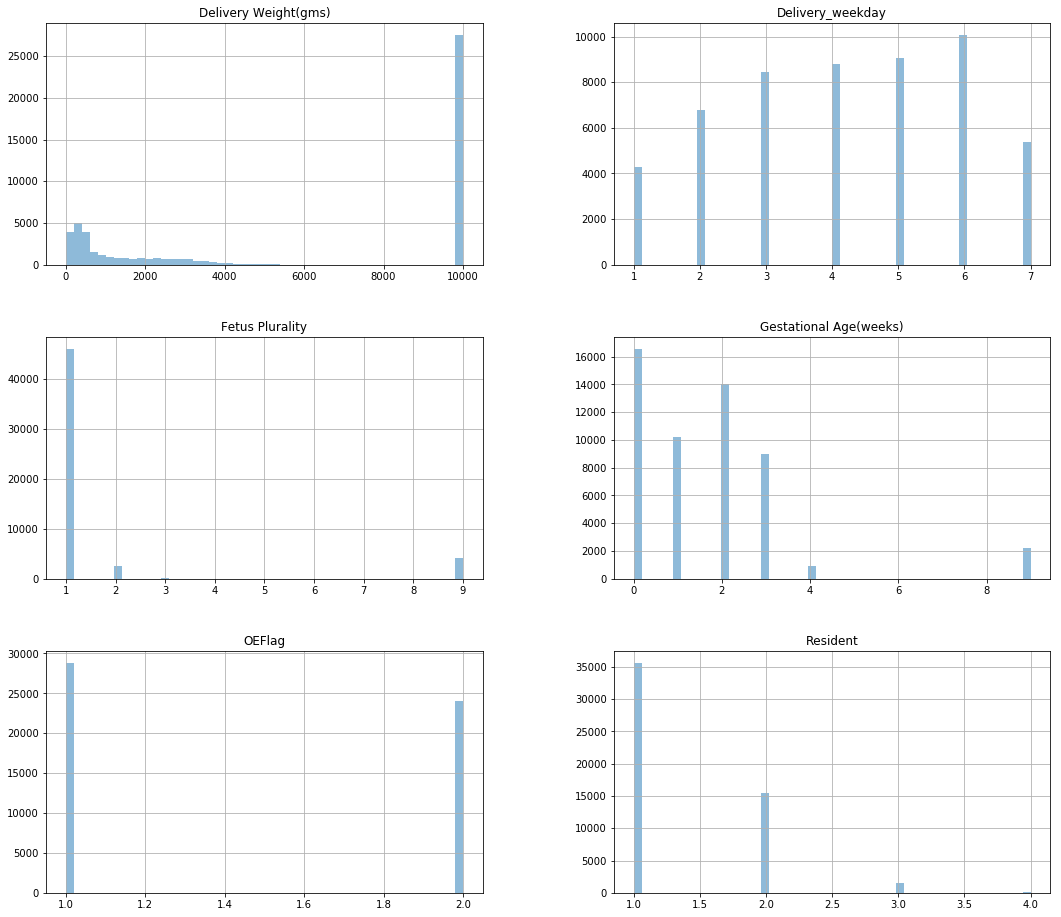

In [3]:
df.hist(figsize=(18, 16), alpha=0.5, bins=50)
plt.show()


In [13]:
#data with root cause of death in ICD10 field
icds = df.loc[df["ICD10"].notnull(), :]


pandas.core.frame.DataFrame

In [21]:
#data with root cause of death in ICD10 field
birthwt = icds.loc[df["GA"].notnull(), :]
birthwt

KeyboardInterrupt: 

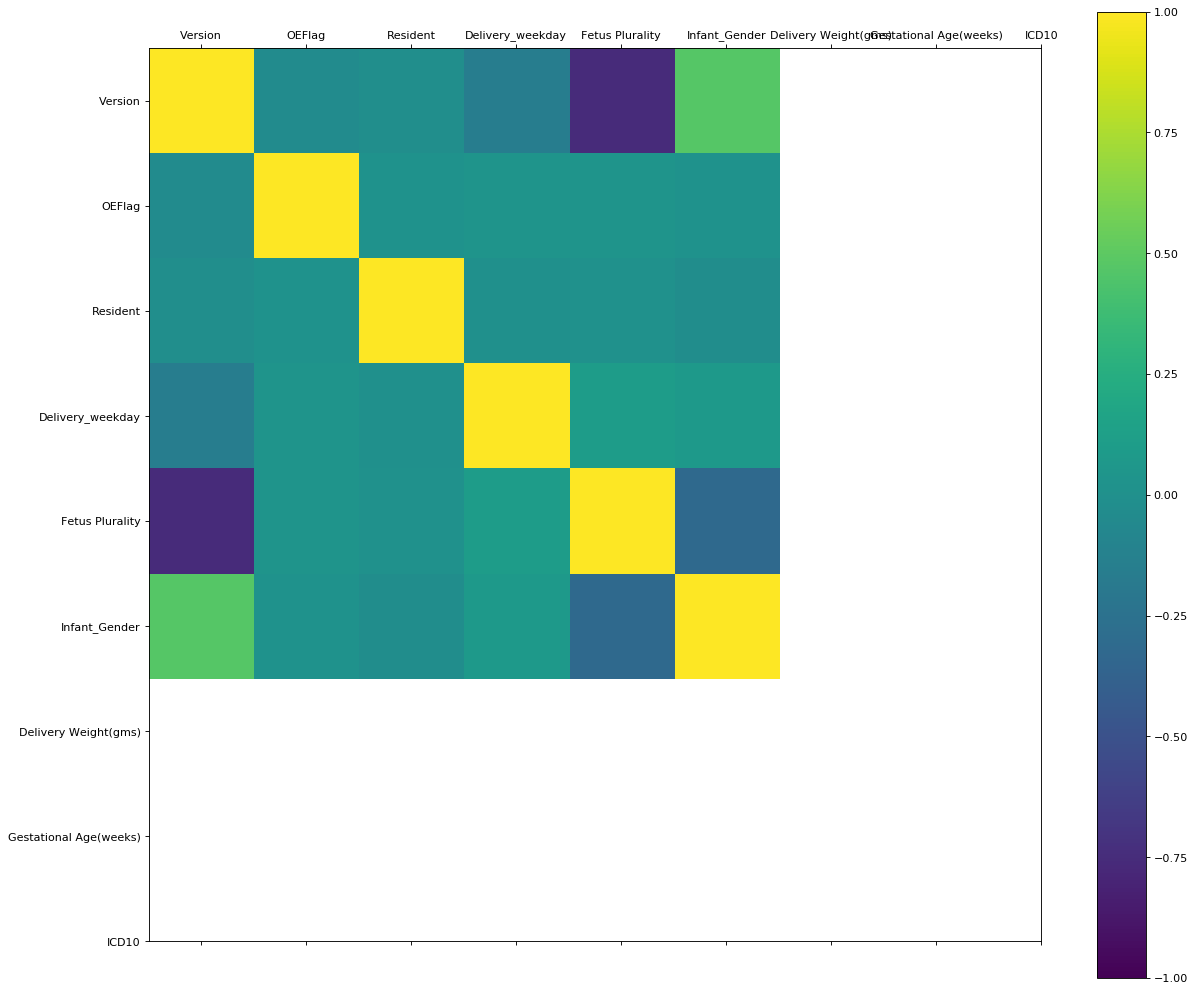

In [6]:
correlations = icds.corr()
# plot correlation matrix
fig = plt.figure(figsize=(18, 16), dpi= 80)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(headerNames)
ax.set_yticklabels(headerNames)
plt.show()

fig.savefig('FeatureCorrelation.png') 

In [7]:
icds

,OEFlag,Resident,Delivery_weekday,Fetus Plurality,Infant_Gender,Delivery Weight(gms),Gestational Age(weeks),ICD10
Version,,,,,,,,
A,1,1,5,1,F,81,1,P011
A,2,1,4,1,M,160,2,P008
A,2,1,2,1,F,510,2,P95
A,2,1,2,1,M,9999,3,P95
A,2,2,4,1,M,2620,3,P000
A,2,3,6,1,F,1191,2,P011
A,2,1,1,1,F,4411,3,P700
A,2,1,3,1,M,2211,3,P051
A,2,1,1,1,F,851,3,P95


In [8]:
#find the largest cause of fetal death in 2014
# P95 is 'still born'
icds = df.groupby('ICD10')
for name, groupdf in icds:
    if groupdf['ICD10'].count() == icds.size().max():
        print(name," -- ",groupdf['ICD10'].count())
    
    

P95  --  19294


In [9]:
icds.size()

ICD10
B24       2
D180      1
D181    106
D369      1
D480      2
D487      1
D570      1
D571      1
D582      1
D685      2
D689      1
D693      1
D720      1
D728      1
D821      1
E031      1
E343      1
E701      1
E724      1
G930      4
I469      3
I639      3
K070      1
K550      1
N049      1
P000    811
P001     32
P002    100
P003     85
P004      3
       ... 
Q894      5
Q897    108
Q898     19
Q899    104
Q909    134
Q913    297
Q917     85
Q921      1
Q927     25
Q928      8
Q929     18
Q933      1
Q935      3
Q938      3
Q939      1
Q960      2
Q968      6
Q969    122
Q970      1
Q971      1
Q991      1
Q998      6
Q999     56
R14       1
R18       5
R190      1
R238      2
R298      3
R772      3
V892      1
dtype: int64

In [10]:
grpicds = icds.size()
grpicds.head()


ICD10
B24       2
D180      1
D181    106
D369      1
D480      2
dtype: int64

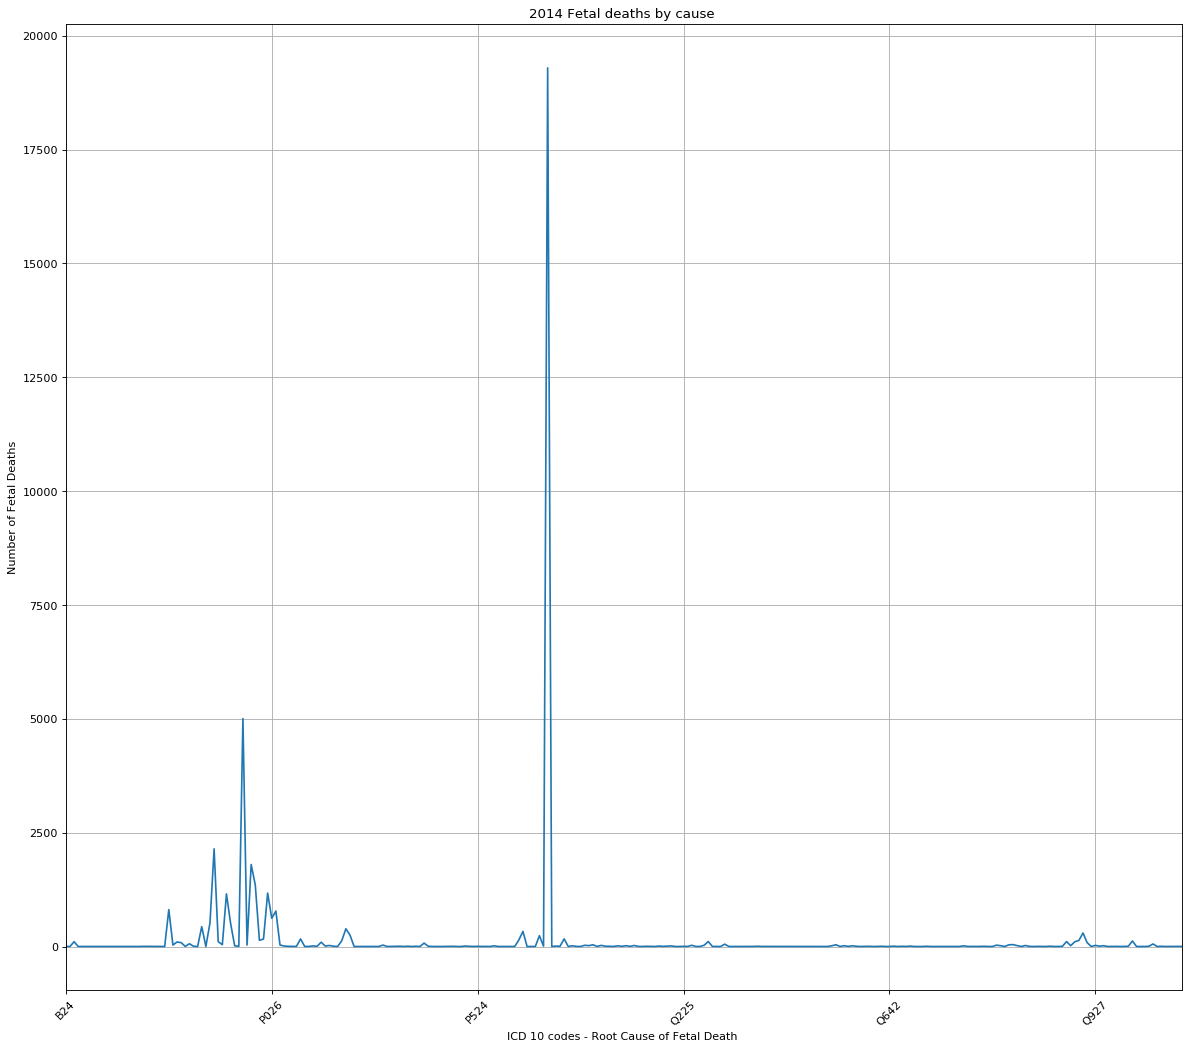

In [11]:
#plot of all root cause of fetal death(x-axis) and #deaths (y-axis)
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.title("2014 Fetal deaths by cause ")
subplt = fig.add_subplot(1,1,1)
grpicds.plot(rot=45,grid=True ) #ax=subplt, logy=True

subplt.set_ylabel("Number of Fetal Deaths")
subplt.set_xlabel("ICD 10 codes - Root Cause of Fetal Death ")

plt.show()
fig.savefig('LeadingFetalCOD2014.png') 